In [2]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

In [3]:
lam = 633e-9
k = 2*np.pi/lam
dx = 4.65e-6
dy = dx

In [4]:
Hologram = cv.imread('hologram.bmp')
Background = cv.imread('background.bmp')
Hologram = cv.cvtColor(Hologram, cv.COLOR_BGR2GRAY)
Background = cv.cvtColor(Background, cv.COLOR_BGR2GRAY)

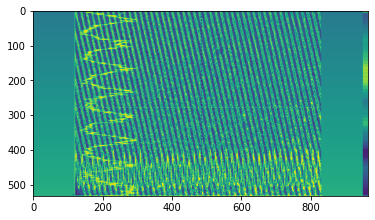

In [5]:
plt.imshow(Hologram)
plt.show()

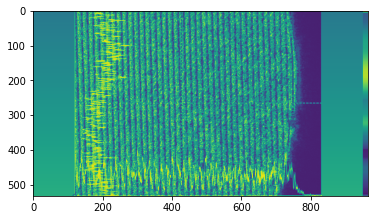

In [12]:
plt.imshow(Background)
plt.show()

In [6]:
Uh = Hologram - Background
(Ny,Nx) = np.shape(Uh)
[II,JJ] = np.meshgrid(Nx-1,Ny-1)
X = (II - (Nx - 1)/2)*dx
Y = (JJ - (Ny - 1)/2)*dy
kx = 2*np.pi/dx*(II - (Nx - 1)/2)/Nx
ky = 2*np.pi/dy*(JJ - (Ny - 1)/2)/Ny

In [7]:
#The reconstruction distance from the imager 
z = 27.9e-3
#The physical distance from the source to imager 
L = 71.0e-3

In [8]:
R = np.exp(-1j*k*np.sqrt(L**2+X**2+Y**2))/np.sqrt(L**2+X**2+Y**2)
T = np.fft.fftshift(np.exp(1j*z*np.sqrt(k**2-kx**2-ky**2)))
K = np.fft.ifft2(np.fft.fft2(Uh*R)*T)


In [9]:
K.shape

(533, 965)

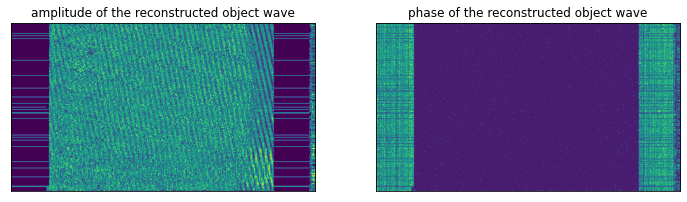

In [11]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(1,2,1)
ax.title.set_text('amplitude of the reconstructed object wave')
ax.set_xticks([])
ax.set_yticks([])
plt.imshow(abs(K))

ax2 = fig.add_subplot(1,2,2)
ax2.title.set_text('phase of the reconstructed object wave')
ax2.set_xticks([])
ax2.set_yticks([])
plt.imshow(np.angle(K))